In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [146]:
# Reading the file and skip the first 4 rows
gdp_df = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_es_csv_v2_5998674.csv", skiprows=4)
gdp_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN,NaN
1,NaN,AFE,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,...,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12,NaN
2,Afganistán,AFG,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN,NaN
3,NaN,AFW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,...,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11,NaN
4,Angola,AGO,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11,NaN


In [147]:

df = gdp_df[(gdp_df['Country Name'] == 'Alemania') | (gdp_df['Country Name'] == 'Unión Europea')]
df = df.drop(columns=['Country Name','Country Code', 'Indicator Name', 'Indicator Code'])
df = df.transpose()
df = df.reset_index()
df = df.rename(columns={'index': 'YEAR', 55: 'GERMANY',73:'EU'})
df = df[(df['YEAR'] > '1969') & (df['YEAR'] < '2022')]

germany_gdp_df = df
germany_gdp_df.head()

,YEAR,GERMANY,EU
10,1970,2.158384e+11,7.258823e+11
11,1971,2.499851e+11,8.207577e+11
12,1972,2.998015e+11,9.903620e+11
13,1973,3.983740e+11,1.281934e+12
14,1974,4.453035e+11,1.451652e+12


In [148]:
# Converting datatype to numeric to avoid error
germany_gdp_df['YEAR'] = pd.to_numeric(germany_gdp_df['YEAR'], errors='coerce')
germany_gdp_df['GERMANY'] = pd.to_numeric(germany_gdp_df['GERMANY'], errors='coerce')
germany_gdp_df['EU'] = pd.to_numeric(germany_gdp_df['EU'], errors='coerce')

germany_gdp_df.head()

,YEAR,GERMANY,EU
10,1970,2.158384e+11,7.258823e+11
11,1971,2.499851e+11,8.207577e+11
12,1972,2.998015e+11,9.903620e+11
13,1973,3.983740e+11,1.281934e+12
14,1974,4.453035e+11,1.451652e+12


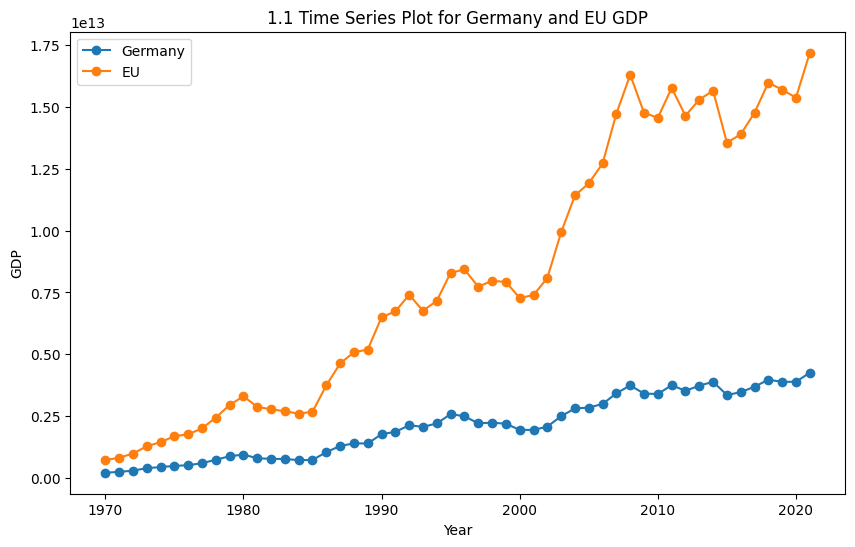

In [149]:
# Configurar el gráfico de líneas
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario

# Trazar la serie temporal de Alemania
plt.plot(germany_gdp_df['YEAR'], germany_gdp_df['GERMANY'], label='Germany', marker='o')

# Trazar la serie temporal de la Unión Europea
plt.plot(germany_gdp_df['YEAR'], germany_gdp_df['EU'], label='EU', marker='o')

# Configurar etiquetas y título
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('1.1 Time Series Plot for Germany and EU GDP')
plt.legend()  # Muestra la leyenda

# Mostrar el gráfico
plt.show()


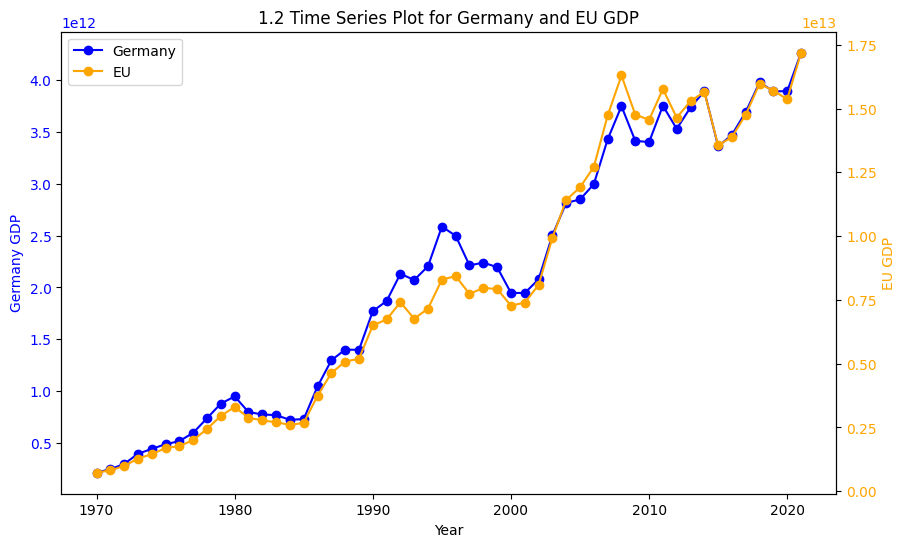

In [150]:
# Configurar el gráfico de líneas
fig, ax1 = plt.subplots(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario

# Trazar la serie temporal de Alemania en el eje y principal
ax1.plot(germany_gdp_df['YEAR'], germany_gdp_df['GERMANY'], label='Germany', marker='o', color='blue')

# Configurar etiquetas y título para el eje y principal
ax1.set_xlabel('Year')
ax1.set_ylabel('Germany GDP', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para la serie de la Unión Europea
ax2 = ax1.twinx()

# Trazar la serie temporal de la Unión Europea en el eje y secundario
ax2.plot(germany_gdp_df['YEAR'], germany_gdp_df['EU'], label='EU', marker='o', color='orange')

# Configurar etiquetas y título para el eje y secundario
ax2.set_ylabel('EU GDP', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Configurar título general
plt.title('1.2 Time Series Plot for Germany and EU GDP')

# Mover ambas leyendas a la esquina superior izquierda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Mostrar el gráfico
#plt.grid(True)  # Agrega cuadrícula al gráfico si lo deseas
plt.show()


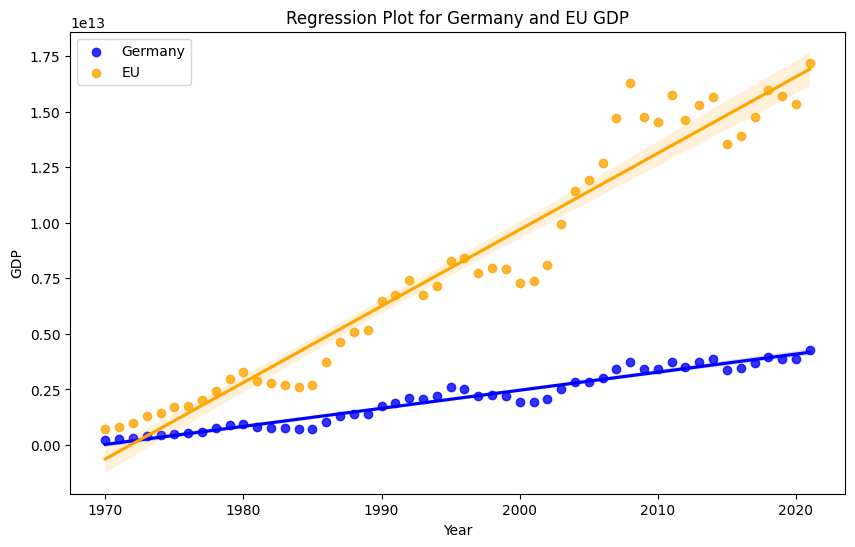

In [151]:
# Configurar el gráfico de regresión
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario

# Trazar la regresión para Alemania
sns.regplot(x='YEAR', y='GERMANY', data=germany_gdp_df, label='Germany', color='blue')

# Trazar la regresión para la Unión Europea
sns.regplot(x='YEAR', y='EU', data=germany_gdp_df, label='EU', color='orange')

# Configurar etiquetas y título
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Regression Plot for Germany and EU GDP')
plt.legend(loc='upper left')

# Mostrar el gráfico
plt.show()


In [152]:
# Codigo para mostrar EU en axis secundario
"""
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado germany_gdp_df con las columnas YEAR, GERMANY y EU

# Configurar el gráfico de regresión
fig, ax1 = plt.subplots(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario

# Trazar la regresión para Alemania en el eje y principal
sns.regplot(x='YEAR', y='GERMANY', data=germany_gdp_df, label='Germany', color='blue', ax=ax1)

# Configurar etiquetas y título para el eje y principal
ax1.set_xlabel('Year')
ax1.set_ylabel('Germany GDP', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para la regresión de la Unión Europea
ax2 = ax1.twinx()

# Trazar la regresión para la Unión Europea en el eje y secundario
sns.regplot(x='YEAR', y='EU', data=germany_gdp_df, label='EU', color='orange', ax=ax2)

# Configurar etiquetas y título para el eje y secundario
ax2.set_ylabel('EU GDP', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Configurar título general
plt.title('Regression Plot for Germany and EU GDP')

# Mover ambas leyendas a la esquina superior izquierda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Mostrar el gráfico
plt.grid(True)  # Agrega cuadrícula al gráfico si lo deseas
plt.show()

"""

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Supongamos que tienes un DataFrame llamado germany_gdp_df con las columnas YEAR, GERMANY y EU\n\n# Configurar el gráfico de regresión\nfig, ax1 = plt.subplots(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario\n\n# Trazar la regresión para Alemania en el eje y principal\nsns.regplot(x='YEAR', y='GERMANY', data=germany_gdp_df, label='Germany', color='blue', ax=ax1)\n\n# Configurar etiquetas y título para el eje y principal\nax1.set_xlabel('Year')\nax1.set_ylabel('Germany GDP', color='blue')\nax1.tick_params(axis='y', labelcolor='blue')\n\n# Crear un segundo eje y para la regresión de la Unión Europea\nax2 = ax1.twinx()\n\n# Trazar la regresión para la Unión Europea en el eje y secundario\nsns.regplot(x='YEAR', y='EU', data=germany_gdp_df, label='EU', color='orange', ax=ax2)\n\n# Configurar etiquetas y título para el eje y secundario\nax2.set_ylabel('EU GDP', color='orange')\nax2.tick_params(axis='y', labelcolor

In [154]:
# Linear Regression
lri = LinearRegression()

# Train model
lri.fit(germany_gdp_df[['YEAR']], germany_gdp_df['GERMANY'])


LinearRegression()

In [155]:
#lri.predict([[2022]]) # Así marcará advertencia

# Hacer la predicción con la característica 'GERMANY'
new_data = pd.DataFrame({'YEAR': [2022]})
prediction_germany = lri.predict(new_data[['YEAR']])
print(prediction_germany)


[4.25428106e+12]


In [162]:
# Para comprobar el valor opriginal y lo estimado por el modelo 
data_prediction = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_es_csv_v2_5998674.csv", skiprows=4)
df = data_prediction[data_prediction['Country Name'] == 'Alemania']
df = df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
df = df.transpose()
df = df.reset_index()
df = df.rename(columns={'index': 'YEAR', 55: 'GDP'})
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

# Filtrar por el año 2022
df = df[df['YEAR'] == 2022]

df.head()

,YEAR,GDP
62,2022.0,4.072192e+12
